# Read in Census and SD data
# Build dataframe of scaled features and scaled labels (i.e., median number of days businesses have been open in each tract)
## Add in some dummy variables for simplified NAICS code
## Add in some interaction terms

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Labels

In [2]:
# define list of simple NAICS business codes
codes = [11,21,22,23,31,32,33,42,44,45,48,49,51,52,53,54,55,56,61,62,71,72,81,92]
print len(codes)

# read in labels (i.e., business info)
bus = pd.read_csv('data_final/sd_active_businesses_cleaned.csv')
print len(bus)
bus[:5]

24
56710


,account_key,doing_bus_as_name,days_since_creation,naics_code,naics_code_simple,census_tract
0,2016008533,ARCHITECT ATHLETICS,61,42199,42,3212
1,2016008531,SILVER LINING STAGERS,61,54149,54,8335
2,2016008529,TAMKEEN INC,61,42299,42,8511
3,2016008525,REBECCA EICHTEN ART DESIGN,61,45311,45,900
4,2016008524,COLD STONE CREAMERY 20837,61,72221,72,7905


In [3]:
# drop tract 9902 (mostly SD Harbor, not much land) is always best tract, w/ only 3 quite old businesses (10-30 yr)
bus = bus[bus.census_tract != 9902]
# drop tract 3800 (mostly Naval Base SD) is always worst tract, w/ 11 relatively young businesses (typically ~3 yr)
#bus = bus[bus.census_tract != 3800]
print len(bus)

56707


Number of unique simplified NAICS code: 24
56707
54    13378
81     8704
45     4438
62     4262
56     3788
44     3419
72     3121
53     3016
42     2023
23     1992
48     1782
61     1533
71     1406
52     1202
51      760
33      750
32      304
31      247
49      231
55      227
11       77
22       38
92        7
21        2
Name: naics_code_simple, dtype: int64


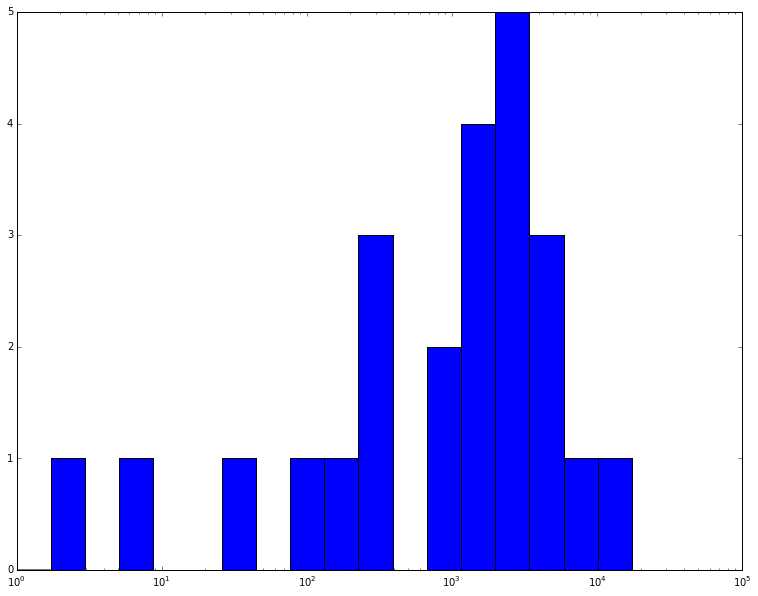

In [4]:
# count number of simplified NAICS codes
code_counts = bus.naics_code_simple.value_counts()
print 'Number of unique simplified NAICS code: '+str(code_counts.count())
print sum(code_counts)
print code_counts

# plot histogram of code counts
plt.figure(figsize=(13, 10))
MIN = 1
MAX = 30000
plt.hist(code_counts.values, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 20))
plt.gca().set_xscale("log")

In [5]:
# get median days since creation for each tract
tracts_age = bus.groupby('census_tract').median().days_since_creation
tracts = tracts_age.index
median_days_open = tracts_age.values
print tracts
print median_days_open[0:10]
print len(tracts)

Int64Index([  100,   201,   202,   300,   400,   500,   600,   700,   800,
              900,
            ...
            20404, 20706, 20707, 20709, 20710, 21100, 21302, 21400, 21500,
            21800],
           dtype='int64', name=u'census_tract', length=313)
[ 3751.   3726.5  3751.   3374.   3579.5  3123.5  2708.   3106.   2527.
  1874. ]
313


0.243835616438
18.7589041096
0.243835616438
18.7589041096
7.73871504223
8.18904109589
2.44945964797


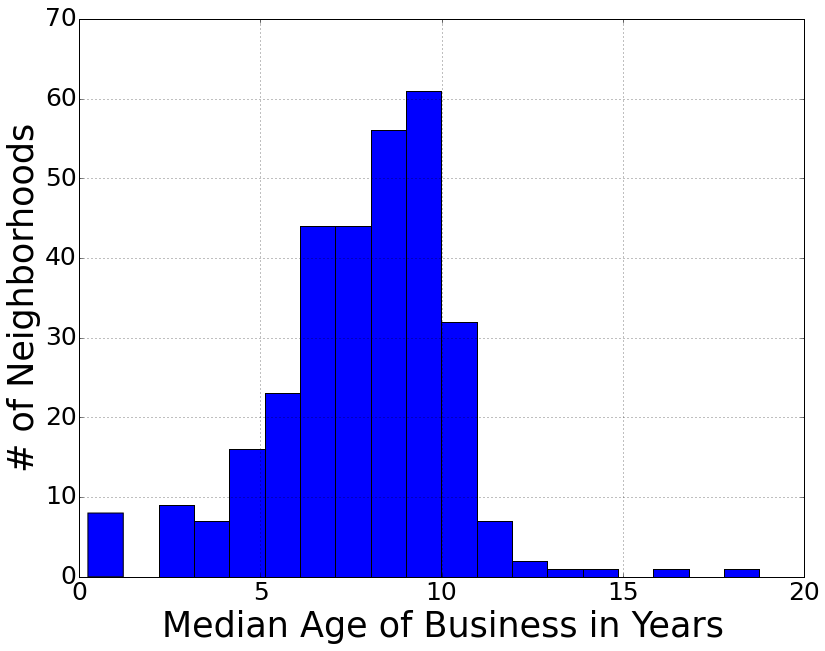

In [6]:
# plot histogram of median days since creation
plt.figure(figsize=(13, 10))
(tracts_age/365).hist(bins=19)
plt.xlabel('Median Age of Business in Years',fontsize=35)
plt.ylabel('# of Neighborhoods',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=25)

# print some stats of ages
print min(tracts_age/365)
print max(tracts_age/365)
print min(median_days_open/365)
print max(median_days_open/365)
print np.mean(tracts_age/365)
print np.median(tracts_age/365)
print np.std(tracts_age/365)

32


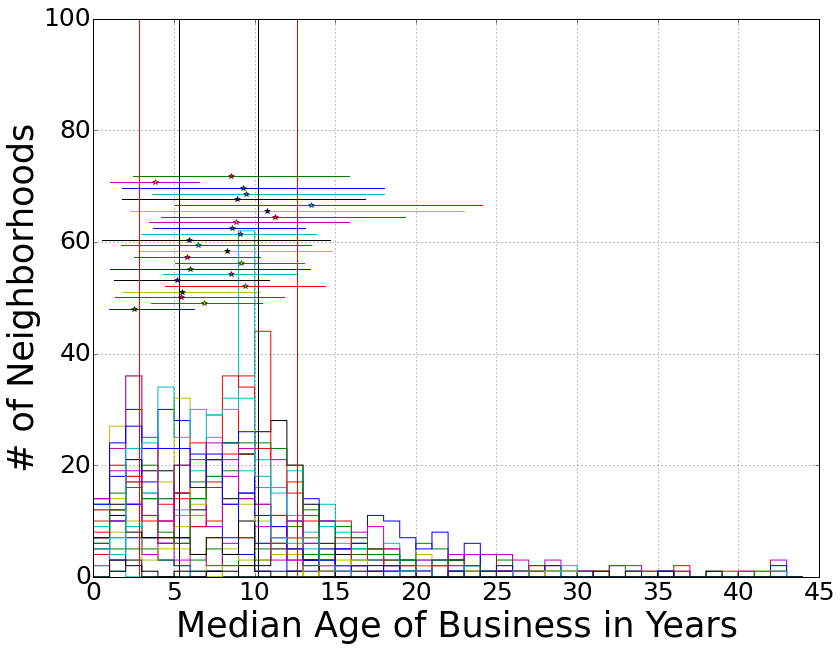

In [7]:
plt.figure(figsize=(13, 10))
n = 0
# go through each code
for code in codes:
    # only look at current code
    bus_copy = bus.copy()
    bus_copy = bus_copy[bus_copy.naics_code_simple==code]
    
    # get median days since creation for each tract
    tracts_age_copy = bus_copy.groupby('census_tract').median().days_since_creation

    # plot histogram of median days since creation
    (tracts_age_copy/365).hist(bins=range(0,45), histtype='step', align='mid')
    
    # plot mean and std
    plt.plot([np.mean(tracts_age_copy/365)-np.std(tracts_age_copy/365),np.mean(tracts_age_copy/365),np.mean(tracts_age_copy/365)+np.std(tracts_age_copy/365)]\
             ,[60*((23-n)/58.+.8),60*((23-n)/58.+.8),60*((23-n)/58.+.8)])
    plt.plot([np.median(tracts_age_copy/365)],[60*((23-n)/58.+.8)],'*')
    n+=1
    if np.mean(tracts_age_copy/365) > 14:
        print code
plt.plot([np.mean(tracts_age/365)+np.std(tracts_age/365),np.mean(tracts_age/365)+np.std(tracts_age/365)],[0,100],'k')
plt.plot([np.mean(tracts_age/365)-np.std(tracts_age/365),np.mean(tracts_age/365)-np.std(tracts_age/365)],[0,100],'k')
plt.plot([np.mean(tracts_age/365)+2*np.std(tracts_age/365),np.mean(tracts_age/365)+2*np.std(tracts_age/365)],[0,100],'r')
plt.plot([np.mean(tracts_age/365)-2*np.std(tracts_age/365),np.mean(tracts_age/365)-2*np.std(tracts_age/365)],[0,100],'r')
plt.xlabel('Median Age of Business in Years',fontsize=35)
plt.ylabel('# of Neighborhoods',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=25)

[ 0.54187629  0.53825096  0.54187629  0.48609056  0.51649896  0.44902338
  0.38754069  0.44643386  0.36075762  0.2641314 ]
1.0
0.0
0.404798903583
0.429121041728
0.132295467817


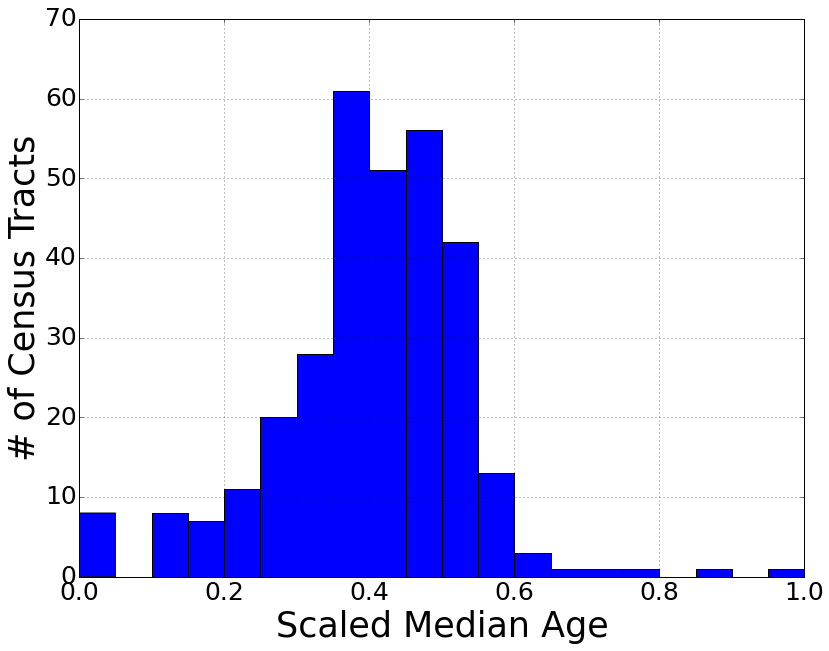

In [8]:
# scale labels to 0-1
median_days_open_scaled = (median_days_open-min(median_days_open)) / (max(median_days_open)-min(median_days_open))
print median_days_open_scaled[:10]
print max(median_days_open_scaled)
print min(median_days_open_scaled)

# plot new histogram
plt.figure(figsize=(13, 10))
plt.hist(median_days_open_scaled,bins=20)
plt.xlabel('Scaled Median Age',fontsize=35)
plt.ylabel('# of Census Tracts',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.grid()

# print some stats of scaled ages
print np.mean(median_days_open_scaled)
print np.median(median_days_open_scaled)
print np.std(median_days_open_scaled)

## Features

In [9]:
# get counts of each simple business code in each tract
counts = bus.groupby(['census_tract','naics_code_simple']).size()

# initialize matrix of business counts per tract
counts_matrix = np.zeros((len(tracts),len(codes)))
i = 0
j = 0

# go through each tract
for tract in tracts:
    # go through each simple code
    for code in codes:
        # see if the current combination of tract and code exists
        if (tract,code) in counts:
            # save count
            counts_matrix[i,j] = counts[(tract,code)]
        #else:
            #print str(tract)+' '+str(code)
        j += 1
    i += 1
    j = 0
print counts_matrix[:10,:]
print counts[:33] 

[[   1.    0.    0.    5.    0.    0.    1.    4.    2.    8.    0.    0.
     2.    3.   11.   58.    1.    4.    6.    8.    3.    6.   10.    0.]
 [   0.    0.    0.    6.    0.    0.    1.    0.    9.    7.    1.    0.
     3.    4.    9.   47.    0.    2.    7.   17.    7.    7.   55.    0.]
 [   1.    0.    0.   10.    0.    0.    0.    4.    8.   12.    0.    0.
     5.    2.    9.   61.    2.    6.    7.   11.    6.   12.   28.    0.]
 [   1.    0.    0.    7.    2.    1.    4.    2.   23.   19.    7.    0.
     5.    5.   23.   96.    4.   10.   11.  104.    9.   36.  124.    0.]
 [   0.    0.    0.    4.    1.    0.    1.    6.   24.   21.    2.    0.
     5.   10.   23.   60.    2.   14.   10.  154.    9.   39.   95.    0.]
 [   0.    0.    0.    5.    2.    0.    0.    2.    8.   13.    1.    0.
     3.    5.    8.   61.    3.    5.    9.   25.    8.   10.   34.    0.]
 [   0.    0.    0.    5.    1.    0.    0.    3.   19.   14.    1.    0.
     6.    5.    9.   39.    0. 

In [10]:
# save total # of businesses in each tract
n_bus_all = bus.groupby('census_tract').count().account_key
print n_bus_all[:10]

census_tract
100    133
201    182
202    184
300    493
400    480
500    202
600    251
700    214
800    134
900    235
Name: account_key, dtype: int64


In [11]:
print len(tracts)
print len(median_days_open_scaled)
print len(n_bus_all)
print counts_matrix.shape

313
313
313
(313, 24)


In [12]:
# combine feaures from business info into a dataframe
bus_features = pd.DataFrame({'bus_age': median_days_open_scaled, 'n_business': n_bus_all, \
                             'n_businesses_'+str(codes[0]): counts_matrix[:,0], \
                             'n_businesses_'+str(codes[1]): counts_matrix[:,1], \
                             'n_businesses_'+str(codes[2]): counts_matrix[:,2], \
                             'n_businesses_'+str(codes[3]): counts_matrix[:,3], \
                             'n_businesses_'+str(codes[4]): counts_matrix[:,4], \
                             'n_businesses_'+str(codes[5]): counts_matrix[:,5], \
                             'n_businesses_'+str(codes[6]): counts_matrix[:,6], \
                             'n_businesses_'+str(codes[7]): counts_matrix[:,7], \
                             'n_businesses_'+str(codes[8]): counts_matrix[:,8], \
                             'n_businesses_'+str(codes[9]): counts_matrix[:,9], \
                             'n_businesses_'+str(codes[10]): counts_matrix[:,10], \
                             'n_businesses_'+str(codes[11]): counts_matrix[:,11], \
                             'n_businesses_'+str(codes[12]): counts_matrix[:,12], \
                             'n_businesses_'+str(codes[13]): counts_matrix[:,13], \
                             'n_businesses_'+str(codes[14]): counts_matrix[:,14], \
                             'n_businesses_'+str(codes[15]): counts_matrix[:,15], \
                             'n_businesses_'+str(codes[16]): counts_matrix[:,16], \
                             'n_businesses_'+str(codes[17]): counts_matrix[:,17], \
                             'n_businesses_'+str(codes[18]): counts_matrix[:,18], \
                             'n_businesses_'+str(codes[19]): counts_matrix[:,19], \
                             'n_businesses_'+str(codes[20]): counts_matrix[:,20], \
                             'n_businesses_'+str(codes[21]): counts_matrix[:,21], \
                             'n_businesses_'+str(codes[22]): counts_matrix[:,22], \
                             'n_businesses_'+str(codes[23]): counts_matrix[:,23],}, index=tracts)
bus_features[:5]

,bus_age,n_business,n_businesses_11,n_businesses_21,n_businesses_22,n_businesses_23,n_businesses_31,n_businesses_32,n_businesses_33,n_businesses_42,...,n_businesses_53,n_businesses_54,n_businesses_55,n_businesses_56,n_businesses_61,n_businesses_62,n_businesses_71,n_businesses_72,n_businesses_81,n_businesses_92
census_tract,,,,,,,,,,,,,,,,,,,,,
100,0.541876,133,1.0,0.0,0.0,5.0,0.0,0.0,1.0,4.0,...,11.0,58.0,1.0,4.0,6.0,8.0,3.0,6.0,10.0,0.0
201,0.538251,182,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,...,9.0,47.0,0.0,2.0,7.0,17.0,7.0,7.0,55.0,0.0
202,0.541876,184,1.0,0.0,0.0,10.0,0.0,0.0,0.0,4.0,...,9.0,61.0,2.0,6.0,7.0,11.0,6.0,12.0,28.0,0.0
300,0.486091,493,1.0,0.0,0.0,7.0,2.0,1.0,4.0,2.0,...,23.0,96.0,4.0,10.0,11.0,104.0,9.0,36.0,124.0,0.0
400,0.516499,480,0.0,0.0,0.0,4.0,1.0,0.0,1.0,6.0,...,23.0,60.0,2.0,14.0,10.0,154.0,9.0,39.0,95.0,0.0


In [13]:
# read in other features
popl = pd.read_csv('data_final/sd_population_cleaned.csv',index_col=0)
fin = pd.read_csv('data_final/sd_housing_employment_income_cleaned.csv',index_col=0)
bike = pd.read_csv('data_final/walk_transit_bike_cleaned.csv',index_col=0)
parking_meters = pd.read_csv('data_final/sd_parking_meters_cleaned.csv',index_col=0)

# choose which features to use (per census tract)
    # n_business (total number of businesses)
    # n_business_NN (total number of businesses with simple NAICS code NN -- there are 24 of these == len(codes))
    # population (population)
    # population_percent_male
    # population_percent_female
    # age_med (median age)
    # age_med_male (median male age)
    # age_med_female (median female age)
    # minor_percent (percenage under 18)
    # adult_percent (percentage over 18)
    # homes (number of homes)
    # homes_percent_mortgage (percentage of homes owne w/ mortgage)
    # homes_percent_clear (percentage of homes owned free & clear)
    # homes_percent_rent (percentage of homes rented)
    # employment_percent (employment percentage)
    # income_med (median income)
    # income_med_owner (median income for owned homes)
    # income_med_renter (median income for rented homes)
    # cost_med (median housing cost)
    # cost_med_owner (median cost for owned homes)
    # cost_med_renter (median cost for rented homes)
    # walk_score
    # transit_score
    # bike_score
    # total_amount (parking meters)

In [14]:
popl[:5]

,population,population_percent_male,population_percent_female,age_med,age_med_male,age_med_female,minor_percent,adult_percent
census_tract,,,,,,,,
100,3029,0.501155,0.498845,50.3,49.8,50.8,0.181248,0.818752
201,1801,0.469184,0.530816,46.5,45.5,48.1,0.131038,0.868962
202,4208,0.506416,0.493584,39.6,40.0,38.8,0.115589,0.884411
300,4732,0.519865,0.480135,38.8,40.9,35.8,0.050297,0.949703
400,3669,0.549741,0.450259,35.5,38.2,32.7,0.047633,0.952367


In [15]:
bike[:10]

,walk_score,transit_score,bike_score
census_tract,,,
1900,72,46,50
9703,38,27,30
9602,38,27,30
8503,40,29,37
8501,40,29,37
9104,46,31,39
9103,46,31,39
9102,46,31,39
9101,46,31,39


4928.84235669
4629.0
2584.1009153


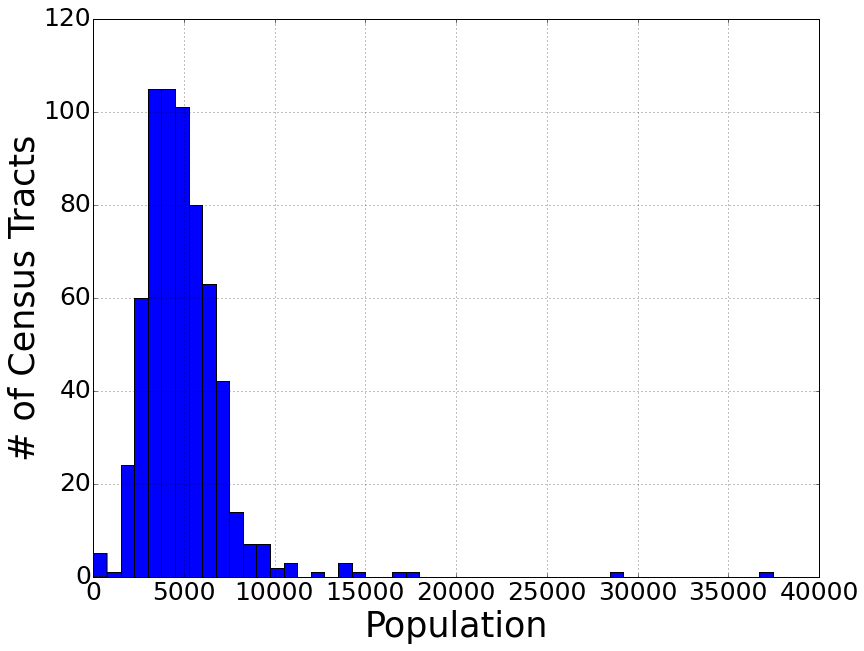

In [16]:
# plot histogram of population per census tract
plt.figure(figsize=(13, 10))
popl.population.hist(bins=50)
plt.xlabel('Population',fontsize=35)
plt.ylabel('# of Census Tracts',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=25)
print np.mean(popl.population)
print np.median(popl.population)
print np.std(popl.population)

In [17]:
fin[:5]

,homes,homes_percent_mortgage,homes_percent_clear,homes_percent_rent,employment_percent,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter
census_tract,,,,,,,,,,,
100,1397,58.9,23.1,18.0,54.6,106406,115066,27813,1895,1923,1839
201,1047,34.1,11.1,54.8,69.2,97976,157500,42891,1338,2243,974
202,2413,32.7,9.5,57.8,75.0,75019,96000,60116,1559,2026,1445
300,3136,21.5,6.6,71.9,71.2,61679,113047,51125,1394,2310,1282
400,2288,12.2,3.4,84.4,75.4,68488,79911,67693,1299,1870,1255


In [18]:
# join business info, population info, financial info, and parking meter info
features = bus_features.join(popl).join(fin).join(bike).join(parking_meters).fillna(0)
print features.shape
features[:10]

(313, 49)


,bus_age,n_business,n_businesses_11,n_businesses_21,n_businesses_22,n_businesses_23,n_businesses_31,n_businesses_32,n_businesses_33,n_businesses_42,...,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter,walk_score,transit_score,bike_score,total_amount
census_tract,,,,,,,,,,,,,,,,,,,,,
100,0.541876,133,1.0,0.0,0.0,5.0,0.0,0.0,1.0,4.0,...,106406,115066,27813,1895,1923,1839,68.0,48.0,49.0,0.0
201,0.538251,182,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,...,97976,157500,42891,1338,2243,974,68.0,48.0,49.0,4161773.0
202,0.541876,184,1.0,0.0,0.0,10.0,0.0,0.0,0.0,4.0,...,75019,96000,60116,1559,2026,1445,60.0,50.0,42.0,11290108.0
300,0.486091,493,1.0,0.0,0.0,7.0,2.0,1.0,4.0,2.0,...,61679,113047,51125,1394,2310,1282,81.0,54.0,58.0,68427664.0
400,0.516499,480,0.0,0.0,0.0,4.0,1.0,0.0,1.0,6.0,...,68488,79911,67693,1299,1870,1255,81.0,54.0,58.0,44826639.0
500,0.449023,202,0.0,0.0,0.0,5.0,2.0,0.0,0.0,2.0,...,54908,84271,50074,1224,1819,1145,79.0,54.0,67.0,2167540.0
600,0.387541,251,0.0,0.0,0.0,5.0,1.0,0.0,0.0,3.0,...,55915,80417,53162,1216,1587,1181,79.0,54.0,67.0,1183230.0
700,0.446434,214,1.0,0.0,0.0,6.0,2.0,1.0,1.0,3.0,...,68977,116372,61905,1347,2417,1241,81.0,54.0,58.0,11955695.0
800,0.360758,134,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,...,45169,92321,40757,1093,1808,1011,0.0,0.0,0.0,1451274.0


In [19]:
# get min/max of each column
min_cols = np.min(features,axis=0)
max_cols = np.max(features,axis=0)

# save min/max as dataframe
min_max_frame = pd.DataFrame({'min_vals': min_cols.values, 'max_vals': max_cols.values}, index=min_cols.index).T

# write min/max of each column to CSV
min_max_frame.to_csv('data_final/min_max_features.csv', index_label='min_max')
min_max_frame

,bus_age,n_business,n_businesses_11,n_businesses_21,n_businesses_22,n_businesses_23,n_businesses_31,n_businesses_32,n_businesses_33,n_businesses_42,...,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter,walk_score,transit_score,bike_score,total_amount
max_vals,1.0,3281.0,4.0,1.0,8.0,185.0,34.0,40.0,148.0,264.0,...,172846.0,230179.0,188750.0,3688.0,4000.0,2000.0,97.0,81.0,84.0,191205635.0
min_vals,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# get mean/std of each column
mean_cols = np.mean(features,axis=0)
std_cols = np.std(features,axis=0)

# save mean/std as dataframe
mean_std_frame = pd.DataFrame({'mean_vals': mean_cols.values, 'std_vals': std_cols.values}, index=mean_cols.index).T

# write mean/std of each column to CSV
mean_std_frame.to_csv('data_final/mean_std_features.csv', index_label='mean_std')
mean_std_frame

,bus_age,n_business,n_businesses_11,n_businesses_21,n_businesses_22,n_businesses_23,n_businesses_31,n_businesses_32,n_businesses_33,n_businesses_42,...,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter,walk_score,transit_score,bike_score,total_amount
mean_vals,0.404799,181.172524,0.246006,0.00639,0.121406,6.364217,0.789137,0.971246,2.396166,6.463259,...,70374.086262,89178.300319,55167.654952,1634.249201,1855.482428,1456.738019,38.047923,28.718850,35.645367,2.398688e+06
std_vals,0.132295,295.381438,0.592977,0.07968,0.647893,14.325571,2.291869,3.142383,10.272777,24.560665,...,32827.099926,35501.788765,27504.014797,588.052693,700.920618,402.577282,25.483709,19.521043,21.763589,1.484107e+07


In [21]:
# feature scale to min/max range
features_scaled = (features-min_cols) / (max_cols-min_cols)
print features_scaled.shape
features_scaled[:10]

(313, 49)


,bus_age,n_business,n_businesses_11,n_businesses_21,n_businesses_22,n_businesses_23,n_businesses_31,n_businesses_32,n_businesses_33,n_businesses_42,...,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter,walk_score,transit_score,bike_score,total_amount
census_tract,,,,,,,,,,,,,,,,,,,,,
100,0.541876,0.040244,0.25,0.0,0.0,0.027027,0.000000,0.000,0.006757,0.015152,...,0.615612,0.499898,0.147354,0.513829,0.48075,0.9195,0.701031,0.592593,0.583333,0.000000
201,0.538251,0.055183,0.00,0.0,0.0,0.032432,0.000000,0.000,0.006757,0.000000,...,0.566840,0.684250,0.227237,0.362798,0.56075,0.4870,0.701031,0.592593,0.583333,0.021766
202,0.541876,0.055793,0.25,0.0,0.0,0.054054,0.000000,0.000,0.000000,0.015152,...,0.434022,0.417067,0.318495,0.422722,0.50650,0.7225,0.618557,0.617284,0.500000,0.059047
300,0.486091,0.150000,0.25,0.0,0.0,0.037838,0.058824,0.025,0.027027,0.007576,...,0.356844,0.491126,0.270861,0.377983,0.57750,0.6410,0.835052,0.666667,0.690476,0.357875
400,0.516499,0.146037,0.00,0.0,0.0,0.021622,0.029412,0.000,0.006757,0.022727,...,0.396237,0.347169,0.358638,0.352223,0.46750,0.6275,0.835052,0.666667,0.690476,0.234442
500,0.449023,0.061280,0.00,0.0,0.0,0.027027,0.058824,0.000,0.000000,0.007576,...,0.317670,0.366111,0.265293,0.331887,0.45475,0.5725,0.814433,0.666667,0.797619,0.011336
600,0.387541,0.076220,0.00,0.0,0.0,0.027027,0.029412,0.000,0.000000,0.011364,...,0.323496,0.349367,0.281653,0.329718,0.39675,0.5905,0.814433,0.666667,0.797619,0.006188
700,0.446434,0.064939,0.25,0.0,0.0,0.032432,0.058824,0.025,0.006757,0.011364,...,0.399066,0.505572,0.327974,0.365239,0.60425,0.6205,0.835052,0.666667,0.690476,0.062528
800,0.360758,0.040549,0.00,0.0,0.0,0.016216,0.000000,0.000,0.006757,0.000000,...,0.261325,0.401084,0.215931,0.296367,0.45200,0.5055,0.000000,0.000000,0.000000,0.007590


In [22]:
# write dataframe to csv
features_scaled.to_csv('data_final/features.csv')
#features.to_csv('data_final/features.csv')